### Naive Bayes Classifier Task
### 문장에서 느껴지는 감정 예측
##### 다중 분류(Multiclass Classification)
- 비대면 심리 상담사로서 메세지를 전달한 환자에 대한 감정 데이터를 수집했다.
- 각 메세지 별로 감정이 표시되어 있다.
- 미래에 동일한 메세지를 보내는 환자에게 어떤 심리 치료가 적합할 수 있는지 알아보기 위한 모델을 구축한다

#### 데이터 확인 및 분리

In [55]:
import pandas as pd

feeling_df = pd.read_csv('./datasets/feeling.csv',sep=';')
feeling_df

message  feeling
0      im feeling quite sad and sorry for myself but ...  sadness
1      i feel like i am still looking at a blank canv...  sadness
2                         i feel like a faithful servant     love
3                      i am just feeling cranky and blue    anger
4      i can have for a treat or if i am feeling festive      joy
...                                                  ...      ...
17995  i just had a very brief time in the beanbag an...  sadness
17996  i am now turning and i feel pathetic that i am...  sadness
17997                     i feel strong and good overall      joy
17998  i feel like this was such a rude comment and i...    anger
17999  i know a lot but i feel so stupid because i ca...  sadness

[18000 rows x 2 columns]

In [56]:
feeling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  18000 non-null  object
 1   feeling  18000 non-null  object
dtypes: object(2)
memory usage: 281.4+ KB


In [57]:
feeling_df.isna().sum()

message    0
feeling    0
dtype: int64

#### 타겟 데이터의 분포확인

In [58]:
feeling_df['feeling'].value_counts()

feeling
joy         6066
sadness     5216
anger       2434
fear        2149
love        1482
surprise     653
Name: count, dtype: int64

In [59]:
emo_df = feeling_df.copy()


In [60]:
from sklearn.preprocessing import LabelEncoder

spam_encoder = LabelEncoder()
targets = spam_encoder.fit_transform(emo_df.loc[:,'feeling'])
emo_df['Target'] = targets


In [61]:
emo_df.drop(labels=['feeling'],axis=1)

message  Target
0      im feeling quite sad and sorry for myself but ...       4
1      i feel like i am still looking at a blank canv...       4
2                         i feel like a faithful servant       3
3                      i am just feeling cranky and blue       0
4      i can have for a treat or if i am feeling festive       2
...                                                  ...     ...
17995  i just had a very brief time in the beanbag an...       4
17996  i am now turning and i feel pathetic that i am...       4
17997                     i feel strong and good overall       2
17998  i feel like this was such a rude comment and i...       0
17999  i know a lot but i feel so stupid because i ca...       4

[18000 rows x 2 columns]

#### 벡터화 확인

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

# count Vectorizer를 이용하여 메세지 분류 확인
c_vct = CountVectorizer()
freq = c_vct.fit_transform(emo_df.message)

# 확인이 쉽도록 array형태로 변환
print(freq.toarray())

# 각 텍스트 요소가 어떤 순서인지 확인
print(c_vct.vocabulary_)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
{'im': 6996, 'feeling': 5253, 'quite': 11301, 'sad': 12184, 'and': 527, 'sorry': 13223, 'for': 5577, 'myself': 9340, 'but': 1928, 'ill': 6982, 'snap': 13055, 'out': 9981, 'of': 9793, 'it': 7509, 'soon': 13200, 'feel': 5249, 'like': 8237, 'am': 463, 'still': 13554, 'looking': 8384, 'at': 866, 'blank': 1452, 'canvas': 2037, 'pieces': 10529, 'paper': 10181, 'faithful': 5130, 'servant': 12556, 'just': 7747, 'cranky': 3193, 'blue': 1537, 'can': 2010, 'have': 6451, 'treat': 14710, 'or': 9919, 'if': 6962, 'festive': 5286, 'start': 13476, 'to': 14504, 'more': 9160, 'appreciative': 690, 'what': 15712, 'god': 6051, 'has': 6423, 'done': 4162, 'me': 8770, 'confident': 2851, 'that': 14296, 'we': 15619, 'will': 15811, 'be': 1182, 'able': 24, 'take': 14056, 'care': 2073, 'this': 14366, 'baby': 1022, 'incredibly': 7139, 'lucky': 8465, 'talk': 14072, 'her': 6576, 'less': 8163, 'keen':

#### 데이터 분리

In [63]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(emo_df.message, emo_df.Target, stratify=emo_df.Target, test_size=0.2, random_state=124)

#### 파이프라인 구축

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# 단어 카운트 계산 후 특성의 출현 확률을 모델링하여 분류
m_nb_pipe = Pipeline([('count_vectorizer',CountVectorizer()),('multinomialNB',MultinomialNB())])

# 구성한 파이프라인에 학습 데이터 fit
m_nb_pipe.fit(X_train, y_train)

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('multinomialNB', MultinomialNB())])

#### 정확도 점수 확인

In [65]:
m_nb_pipe.score(X_test, y_test)

0.7536111111111111

#### 예측 확인

In [66]:
m_nb_pipe.predict([emo_df.iloc[17997].message])

array([2])

In [67]:
m_nb_pipe.predict(['I was so afraid'])

array([1])

In [68]:
from sklearn.metrics import classification_report

# 테스트 데이터로 예측
y_pred = m_nb_pipe.predict(X_test)

# 분류 보고서 출력
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.59      0.71       487
           1       0.89      0.52      0.66       430
           2       0.71      0.95      0.81      1213
           3       0.88      0.25      0.39       296
           4       0.73      0.93      0.82      1043
           5       1.00      0.06      0.12       131

    accuracy                           0.75      3600
   macro avg       0.85      0.55      0.58      3600
weighted avg       0.79      0.75      0.72      3600



In [100]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay


# 타겟 데이터와 예측 객체를 전달받는다.
# 정밀도 재현율 f1 score는 다중 분류에서 각각의 확률값의 평균을 구해서 나타내야한다.
# 이때 macro방식과 micro 방식이 대표적이다.
# macro : 평균을 낸 뒤 그 평균의 다시 평균을 구하는 방식(샘플 수는 신경쓰지 않는다.)
# micro : 샘플 수를 전체 합하고 전체 개수도 전체 합해서 나눠주는 방식(샘플 수를 신경쓴다.)
# 타겟 데이터의 비중이 많이 차이 난다면, micro 방식을 쓰는 것이 바람직하다.

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction, average='micro')
#     재현율
    recall = recall_score(y_test , prediction, average='micro')
#     F1 score
    f1 = f1_score(y_test, prediction, average='micro')

    print('오차 행렬')
    print(confusion)
    
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[ 94   8   6   1  10  11]
 [  8  94   5   6   3  15]
 [  9   7  78  20   8   9]
 [  3   5  13 106   0   4]
 [ 10  11  11  11  76  12]
 [  1   5   4   6   4 110]]
정확도: 0.7117, 정밀도: 0.7117, 재현율: 0.7117, F1: 0.7117
################################################################################


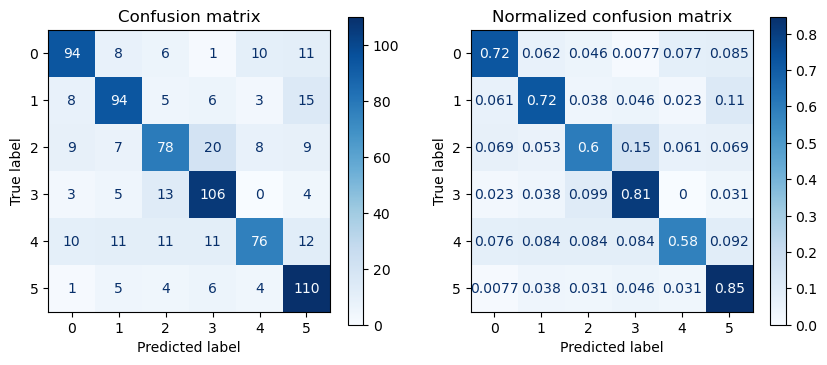

In [101]:
get_evaluation(y_test,y_pred, m_nb_pipe, X_test)

#### 정리

- 위의 오차행렬을 보면, 3과  5에 대한 예측률이 좋지 않다. 이는 타겟데이터의 불균형 문제로 판단된다. 언더 샘플링을 통해 타겟데이터의 비중을 맞춰 주면 T<sub>n</sub>이 높아질 것으로 보인다

In [102]:
import pandas as pd

f_df = pd.read_csv('./datasets/feeling.csv',sep=';')
f_df

message  feeling
0      im feeling quite sad and sorry for myself but ...  sadness
1      i feel like i am still looking at a blank canv...  sadness
2                         i feel like a faithful servant     love
3                      i am just feeling cranky and blue    anger
4      i can have for a treat or if i am feeling festive      joy
...                                                  ...      ...
17995  i just had a very brief time in the beanbag an...  sadness
17996  i am now turning and i feel pathetic that i am...  sadness
17997                     i feel strong and good overall      joy
17998  i feel like this was such a rude comment and i...    anger
17999  i know a lot but i feel so stupid because i ca...  sadness

[18000 rows x 2 columns]

In [103]:
f_df.feeling.value_counts()

feeling
joy         6066
sadness     5216
anger       2434
fear        2149
love        1482
surprise     653
Name: count, dtype: int64

In [104]:
from sklearn.preprocessing import LabelEncoder

spam_encoder = LabelEncoder()
targets = spam_encoder.fit_transform(f_df['feeling'])
f_df['Target'] = targets

In [105]:
f_df.drop(labels=['feeling'],axis=1)

message  Target
0      im feeling quite sad and sorry for myself but ...       4
1      i feel like i am still looking at a blank canv...       4
2                         i feel like a faithful servant       3
3                      i am just feeling cranky and blue       0
4      i can have for a treat or if i am feeling festive       2
...                                                  ...     ...
17995  i just had a very brief time in the beanbag an...       4
17996  i am now turning and i feel pathetic that i am...       4
17997                     i feel strong and good overall       2
17998  i feel like this was such a rude comment and i...       0
17999  i know a lot but i feel so stupid because i ca...       4

[18000 rows x 2 columns]

In [106]:
anger = f_df[f_df.Target == 0].sample(653, random_state=124)  # anger
fear = f_df[f_df.Target == 1].sample(653, random_state=124)  # fear
joy = f_df[f_df.Target == 2].sample(653, random_state=124)  # joy
love = f_df[f_df.Target == 3].sample(653, random_state=124)  # love
sadness = f_df[f_df.Target == 4].sample(653, random_state=124)  # sadness
surprise = f_df[f_df.Target == 5]
under_f_df = pd.concat([anger,fear,joy, love, sadness,surprise]).reset_index(drop=True)

In [107]:
under_f_df.Target.value_counts()

Target
0    653
1    653
2    653
3    653
4    653
5    653
Name: count, dtype: int64

In [108]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(under_f_df.message, under_f_df.Target, stratify=under_f_df.Target, test_size=0.2, random_state=124)

In [109]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# 단어 카운트 계산 후 특성의 출현 확률을 모델링하여 분류
m_nb_pipe = Pipeline([('count_vectorizer',CountVectorizer()),('multinomialNB',MultinomialNB())])

# 구성한 파이프라인에 학습 데이터 fit
m_nb_pipe.fit(X_train, y_train)

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('multinomialNB', MultinomialNB())])

In [110]:
m_nb_pipe.score(X_test, y_test)

0.7117346938775511

In [111]:
from sklearn.metrics import classification_report

# 테스트 데이터로 예측
prediction = m_nb_pipe.predict(X_test)

# 분류 보고서 출력
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74       130
           1       0.72      0.72      0.72       131
           2       0.67      0.60      0.63       131
           3       0.71      0.81      0.75       131
           4       0.75      0.58      0.66       131
           5       0.68      0.85      0.76       130

    accuracy                           0.71       784
   macro avg       0.71      0.71      0.71       784
weighted avg       0.71      0.71      0.71       784



In [113]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay


# 타겟 데이터와 예측 객체를 전달받는다.
# 정밀도 재현율 f1 score는 다중 분류에서 각각의 확률값의 평균을 구해서 나타내야한다.
# 이때 macro방식과 micro 방식이 대표적이다.
# macro : 평균을 낸 뒤 그 평균의 다시 평균을 구하는 방식(샘플 수는 신경쓰지 않는다.)
# micro : 샘플 수를 전체 합하고 전체 개수도 전체 합해서 나눠주는 방식(샘플 수를 신경쓴다.)
# 타겟 데이터의 비중이 많이 차이 난다면, micro 방식을 쓰는 것이 바람직하다.

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction, average='macro')
#     재현율
    recall = recall_score(y_test , prediction, average='macro')
#     F1 score
    f1 = f1_score(y_test, prediction, average='macro')

    print('오차 행렬')
    print(confusion)
    
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[ 94   8   6   1  10  11]
 [  8  94   5   6   3  15]
 [  9   7  78  20   8   9]
 [  3   5  13 106   0   4]
 [ 10  11  11  11  76  12]
 [  1   5   4   6   4 110]]
정확도: 0.7117, 정밀도: 0.7140, 재현율: 0.7119, F1: 0.7087
################################################################################


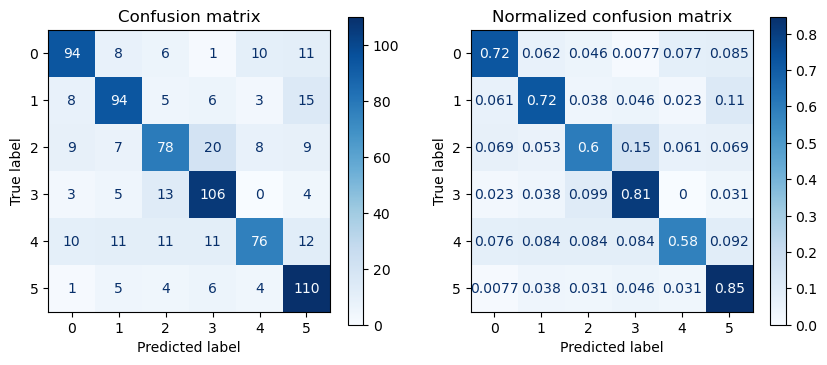

In [114]:
get_evaluation(y_test,prediction, m_nb_pipe, X_test)